Importovanje biblioteka

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, BatchNormalization, Dropout, ReLU
from tensorflow.keras.optimizers import Adam




Ucitavanje dataseta

In [2]:
main_folder = "Data/training_data"

# Rekurzivno prolazi kroz subfoldere i ucitava slike (mi smo imali vise podfoldera)
image_paths = []
for root, dirs, files in os.walk(main_folder):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_paths.append(os.path.join(root, file))

# ucitavanje i promena dimenzija fotografije na 128x128
def load_image(image_path):
    try:
        img = Image.open(image_path).convert("RGB")  
        img = img.resize((128, 128))
        return np.array(img) 
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

y = pd.DataFrame(image_paths, columns=['image_path'])

y['image_data'] = y['image_path'].apply(load_image)

# filtriranje slika gde je ucitavanje neuspesno
y = y[y['image_data'].notnull()]



Prikazivanje jedne učitane fotografije

In [4]:
first_image_array = y['image_data'].iloc[0]
first_image = Image.fromarray(first_image_array)
first_image.show()

Kreiranje crno belih fotografija (input)

In [5]:
# funkija za ucitavanje i konvertovanje fotografija u crno-bele verzije
def load_and_convert_to_bw(image_path):
    try:
        img = Image.open(image_path).convert("L") 
        img = img.resize((128, 128))  
        return np.array(img) 
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

X = pd.DataFrame(image_paths, columns=['image_path'])

X['bw_image_data'] = X['image_path'].apply(load_and_convert_to_bw)

X = X[X['bw_image_data'].notnull()]

Prikazivanje jedne crno-bele fotografije

In [6]:
first_image_array_L = X['bw_image_data'].iloc[0]

first_image_L = Image.fromarray(first_image_array_L)

first_image_L.show()

Čuvanje crno-belih fotografija u zaseban folder

In [7]:
bw_image_folder = "Data/training_data_bw"

os.makedirs(bw_image_folder, exist_ok=True)

def convert_and_save_bw(image_path, save_folder):
    try:
        img = Image.open(image_path).convert("L") 
        img = img.resize((128, 128))  
        
        filename = os.path.basename(image_path)
        name, ext = os.path.splitext(filename)
        new_filename = f"{name}_bw{ext}"
        
        save_path = os.path.join(save_folder, new_filename)
        img.save(save_path)
        print(f"Saved BW image to: {save_path}")
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

for image_path in X['image_path']:
    convert_and_save_bw(image_path, bw_image_folder)

Saved BW image to: Data/training_data_bw\10_bw.jpg
Saved BW image to: Data/training_data_bw\12_bw.jpg
Saved BW image to: Data/training_data_bw\13_bw.jpg
Saved BW image to: Data/training_data_bw\15_bw.jpg
Saved BW image to: Data/training_data_bw\16_bw.jpg
Saved BW image to: Data/training_data_bw\17_bw.jpg
Saved BW image to: Data/training_data_bw\18_bw.jpg
Saved BW image to: Data/training_data_bw\19_bw.jpg
Saved BW image to: Data/training_data_bw\20_bw.jpg
Saved BW image to: Data/training_data_bw\21_bw.jpg
Saved BW image to: Data/training_data_bw\23_bw.jpg
Saved BW image to: Data/training_data_bw\24_bw.jpg
Saved BW image to: Data/training_data_bw\26_bw.jpg
Saved BW image to: Data/training_data_bw\27_bw.jpg
Saved BW image to: Data/training_data_bw\32_bw.jpg
Saved BW image to: Data/training_data_bw\34_bw.jpg
Saved BW image to: Data/training_data_bw\35_bw.jpg
Saved BW image to: Data/training_data_bw\4_bw.jpg
Saved BW image to: Data/training_data_bw\41_bw.jpg
Saved BW image to: Data/training

Učitavanje Test Set-a

In [8]:
main_folder = "Data/test_data"

image_paths = []
for root, dirs, files in os.walk(main_folder):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_paths.append(os.path.join(root, file))

def load_image(image_path):
    try:
        img = Image.open(image_path).convert("RGB")  
        img = img.resize((128, 128))  
        return np.array(img) 
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

y_test = pd.DataFrame(image_paths, columns=['image_path'])

y_test['image_data'] = y_test['image_path'].apply(load_image)

y_test = y_test[y_test['image_data'].notnull()]

Prikaz jedne fotografije iz test set-a

In [9]:
first_image_array = y_test['image_data'].iloc[0]
first_image = Image.fromarray(first_image_array)
first_image.show()

Konvertovanje fotografija iz Test Set-a u crno-bele verzije

In [10]:
def load_and_convert_to_bw(image_path):
    try:
        img = Image.open(image_path).convert("L")  
        img = img.resize((128, 128))  
        return np.array(img) 
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

X_test = pd.DataFrame(image_paths, columns=['image_path'])

X_test['bw_image_data'] = X_test['image_path'].apply(load_and_convert_to_bw)

X_test = X_test[X_test['bw_image_data'].notnull()]

In [11]:
first_image_array_L = X_test['bw_image_data'].iloc[0]

first_image_L = Image.fromarray(first_image_array_L)

first_image_L.show()

In [12]:
bw_image_folder = "Data/test_data_bw"

os.makedirs(bw_image_folder, exist_ok=True)  

def convert_and_save_bw(image_path, save_folder):
    try:
        img = Image.open(image_path).convert("L")  
        img = img.resize((128, 128))  
        
        filename = os.path.basename(image_path)
        name, ext = os.path.splitext(filename)
        new_filename = f"{name}_bw{ext}"
        
        save_path = os.path.join(save_folder, new_filename)
        img.save(save_path)
        print(f"Saved BW image to: {save_path}")
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

for image_path in X_test['image_path']:
    convert_and_save_bw(image_path, bw_image_folder)

Saved BW image to: Data/test_data_bw\20056_bw.jpg
Saved BW image to: Data/test_data_bw\20057_bw.jpg
Saved BW image to: Data/test_data_bw\20058_bw.jpg
Saved BW image to: Data/test_data_bw\20059_bw.jpg
Saved BW image to: Data/test_data_bw\20060_bw.jpg
Saved BW image to: Data/test_data_bw\20061_bw.jpg
Saved BW image to: Data/test_data_bw\20062_bw.jpg
Saved BW image to: Data/test_data_bw\20064_bw.jpg
Saved BW image to: Data/test_data_bw\20066_bw.jpg
Saved BW image to: Data/test_data_bw\20067_bw.jpg
Saved BW image to: Data/test_data_bw\20068_bw.jpg
Saved BW image to: Data/test_data_bw\20069_bw.jpg
Saved BW image to: Data/test_data_bw\20070_bw.jpg
Saved BW image to: Data/test_data_bw\20071_bw.jpg
Saved BW image to: Data/test_data_bw\20072_bw.jpg
Saved BW image to: Data/test_data_bw\20073_bw.jpg
Saved BW image to: Data/test_data_bw\20074_bw.jpg
Saved BW image to: Data/test_data_bw\20075_bw.jpg
Saved BW image to: Data/test_data_bw\20076_bw.jpg
Saved BW image to: Data/test_data_bw\20077_bw.jpg


In [13]:
X_train_np = np.stack(X['bw_image_data'].values[:]).astype('float32') / 255.0
y_train_np = np.stack(y['image_data'].values[:]).astype('float32') / 255.0
X_test_np = np.stack(X_test['bw_image_data'].values[:]).astype('float32') / 255.0
y_test_np = np.stack(y_test['image_data'].values[:]).astype('float32') / 255.0

if X_train_np.ndim == 3:
    X_train_np = X_train_np[..., np.newaxis]
if X_test_np.ndim == 3:
    X_test_np = X_test_np[..., np.newaxis]

Encoder - Decoder Model 

In [15]:


def encoder_decoder(input_shape=(128, 128, 1)):
    inputs = Input(shape=input_shape)

    # Encoder
    x1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x1 = BatchNormalization()(x1)
    x1 = Conv2D(64, (3, 3), activation='relu', padding='same')(x1)
    x1 = BatchNormalization()(x1)
    p1 = MaxPooling2D((2, 2))(x1)
    p1 = Dropout(0.25)(p1)

    x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    x2 = BatchNormalization()(x2)
    x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x2)
    x2 = BatchNormalization()(x2)
    p2 = MaxPooling2D((2, 2))(x2)
    p2 = Dropout(0.25)(p2)

    x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    x3 = BatchNormalization()(x3)
    x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(x3)
    x3 = BatchNormalization()(x3)
    p3 = MaxPooling2D((2, 2))(x3)
    p3 = Dropout(0.25)(p3)

    b = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    b = BatchNormalization()(b)
    b = Dropout(0.4)(b)

    # Decoder
    u3 = UpSampling2D((2, 2))(b)
    u3 = Conv2D(256, (3, 3), activation='relu', padding='same')(u3)
    u3 = BatchNormalization()(u3)
    u3 = Dropout(0.25)(u3)

    u2 = UpSampling2D((2, 2))(u3)
    u2 = Conv2D(128, (3, 3), activation='relu', padding='same')(u2)
    u2 = BatchNormalization()(u2)
    u2 = Dropout(0.25)(u2)

    u1 = UpSampling2D((2, 2))(u2)
    u1 = Conv2D(64, (3, 3), activation='relu', padding='same')(u1)
    u1 = BatchNormalization()(u1)
    u1 = Dropout(0.25)(u1)

    outputs = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(u1)

    model = Model(inputs, outputs)
    return model

In [17]:
model = encoder_decoder(input_shape=(128, 128, 1))  

model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ModelCheckpoint('best_encoder_decoder_model.keras', monitor='val_loss', save_best_only=True)
]

history = model.fit(
    X_train_np, y_train_np,
    validation_data=(X_test_np, y_test_np),
    epochs=20,
    batch_size=128,
    callbacks=callbacks
)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.1487 - mae: 0.3118 - val_loss: 0.0768 - val_mae: 0.2384
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0835 - mae: 0.2223 - val_loss: 0.0759 - val_mae: 0.2371
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0580 - mae: 0.1822 - val_loss: 0.0722 - val_mae: 0.2308
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0501 - mae: 0.1700 - val_loss: 0.0672 - val_mae: 0.2174
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0444 - mae: 0.1596 - val_loss: 0.0680 - val_mae: 0.2124
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0400 - mae: 0.1515 - val_loss: 0.0719 - val_mae: 0.2212
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0378 - mae: 0.1478 - val_loss: 0.0731 - val_mae: 0.2243
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0358 - mae: 0.1443 - val_loss: 0.0697 - val_mae: 0.2187
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0339 - mae: 0.1406 - val_loss: 0.0640 -

Čuvanje modela, predvidjanje i čuvanje fotografija u zasebnom folderu

In [18]:
model.save('colorization_model_encoder_decoder.h5')  

output_folder = "colorized_images_results_encoder_decoder"
os.makedirs(output_folder, exist_ok=True)


grayscale_inputs = X_test_np[:]
predicted_rgbs = model.predict(grayscale_inputs)
predicted_rgbs = (predicted_rgbs * 255).astype(np.uint8)

for i, (grayscale_input, predicted_rgb) in enumerate(zip(grayscale_inputs, predicted_rgbs)):
    grayscale_path = os.path.join(output_folder, f"image_{i+1}_grayscale.png")
    plt.imsave(grayscale_path, grayscale_input.squeeze(), cmap='gray')
    colorized_path = os.path.join(output_folder, f"image_{i+1}_colorized.png")
    plt.imsave(colorized_path, predicted_rgb)

print(f"Saved {len(grayscale_inputs)} grayscale and colorized images to '{output_folder}'.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step
Saved 31 grayscale and colorized images to 'colorized_images_results_encoder_decoder'.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


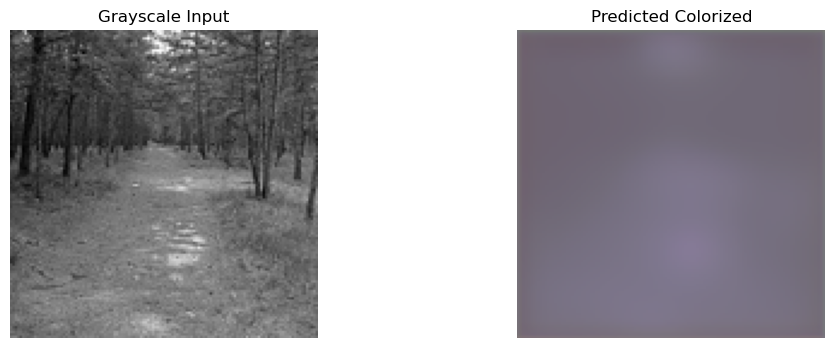

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


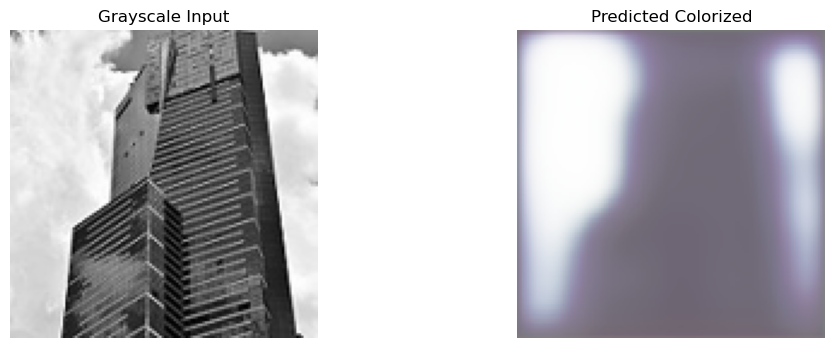

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


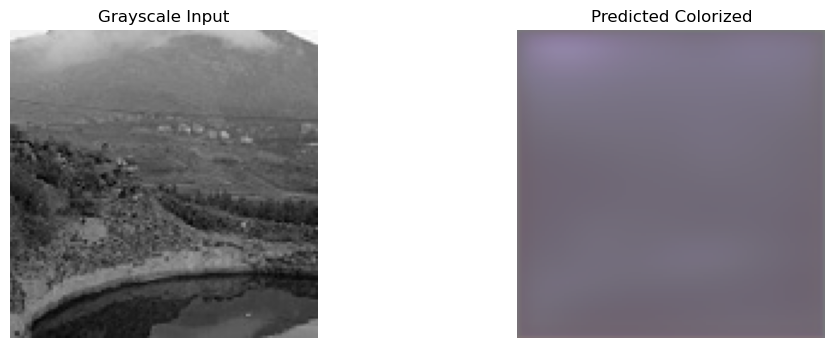

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


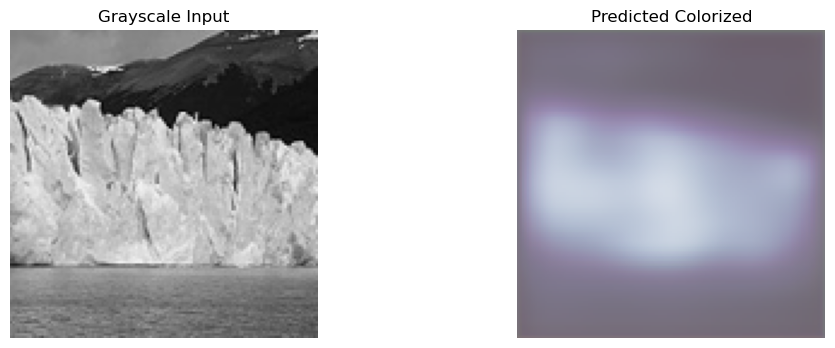

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


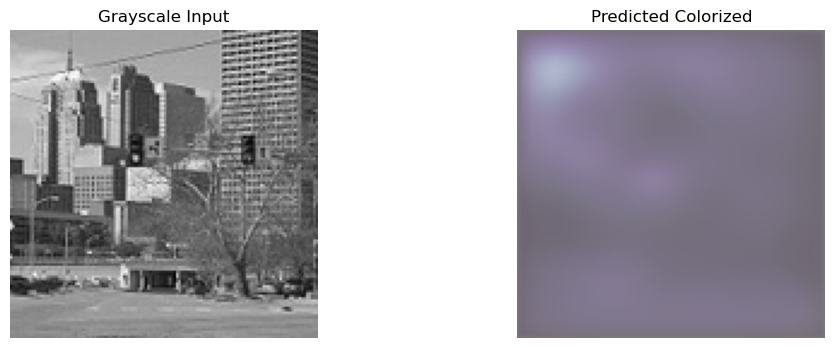

In [20]:

# Prikaz prvih 5 slika
num_images = 5
for i in range(num_images):
    grayscale = X_test_np[i].squeeze()
    predicted = model.predict(X_test_np[i:i+1])[0]
    predicted = (predicted * 255).astype(np.uint8)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale, cmap='gray')
    plt.title('Grayscale Input')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(predicted)
    plt.title('Predicted Colorized')
    plt.axis('off')
    plt.show()

CNN

In [21]:
import tensorflow as tf

def cnn(input_shape=(128, 128, 1)):
    inputs = Input(shape=input_shape)

    x = Conv2D(64, (3, 3), padding="same")(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(64, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(128, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(128, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(256, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(256, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(512, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(512, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    outputs = Conv2D(3, (1, 1), activation="sigmoid")(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model


model_cnn = cnn(input_shape=(128, 128, 1))
model_cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss="mse",
    metrics=["mae"]
)

model_cnn.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 128, 128, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 256)    │             

 Total params: 6,242,627 (23.81 MB)

 Trainable params: 6,237,891 (23.80 MB)

 Non-trainable params: 4,736 (18.50 KB)

In [22]:
cnn_history = model_cnn.fit(
    X_train_np,                
    y_train_np,
    validation_data=(X_test_np, y_test_np),
    epochs=30,                 
    batch_size=64,             
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(
            "cnn_colorization_best.keras",   
            monitor="val_loss",
            save_best_only=True
        ),
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            patience=8,
            restore_best_weights=True
        )
    ],
    verbose=1
)


Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.1069 - mae: 0.2673 - val_loss: 0.0768 - val_mae: 0.2384
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0572 - mae: 0.1889 - val_loss: 0.0773 - val_mae: 0.2393
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0513 - mae: 0.1749 - val_loss: 0.0783 - val_mae: 0.2408
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0353 - mae: 0.1398 - val_loss: 0.0786 - val_mae: 0.2408
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0305 - mae: 0.1290 - val_loss: 0.0790 - val_mae: 0.2403
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0272 - mae: 0.1232 - val_loss: 0.0797 - val_mae: 0.2395
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0260 - mae: 0.1200 - val_loss: 0.0793 - val_mae: 0.2375
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0247 - mae: 0.1156 - val_loss: 0.0774 - val_mae: 0.2337
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0244 - mae: 0.1137 - val_loss: 0.0746 -

Čuvanje modela, predvidjanje i čuvanje fotografija u zasebnom folderu

In [23]:
model_cnn.save('colorization_model_cnn.h5')  

output_folder = "colorized_images_results_u_net"
os.makedirs(output_folder, exist_ok=True)

grayscale_inputs = X_test_np[:]
predicted_rgbs = model_cnn.predict(grayscale_inputs)
predicted_rgbs = (predicted_rgbs * 255).astype(np.uint8)

for i, (grayscale_input, predicted_rgb) in enumerate(zip(grayscale_inputs, predicted_rgbs)):
    grayscale_path = os.path.join(output_folder, f"image_{i+1}_grayscale.png")
    plt.imsave(grayscale_path, grayscale_input.squeeze(), cmap='gray')
    colorized_path = os.path.join(output_folder, f"image_{i+1}_colorized.png")
    plt.imsave(colorized_path, predicted_rgb)

print(f"Saved {len(grayscale_inputs)} grayscale and colorized images to '{output_folder}'.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Saved 31 grayscale and colorized images to 'colorized_images_results_u_net'.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


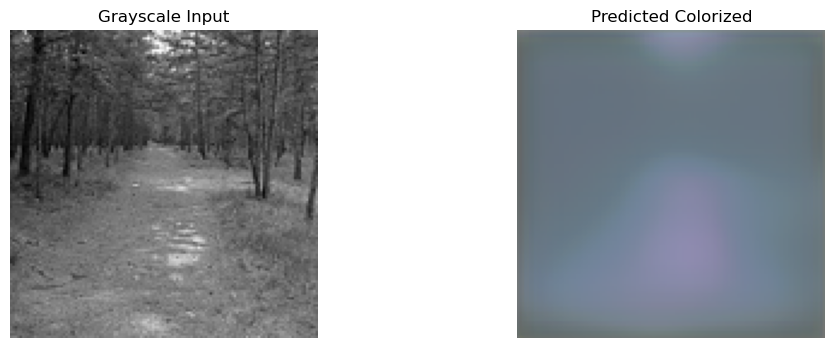

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


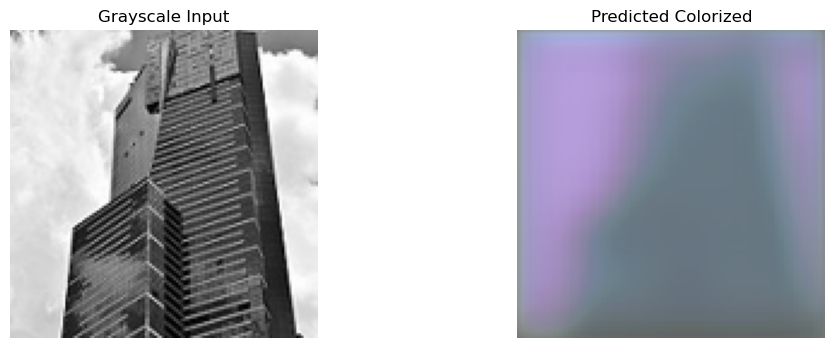

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


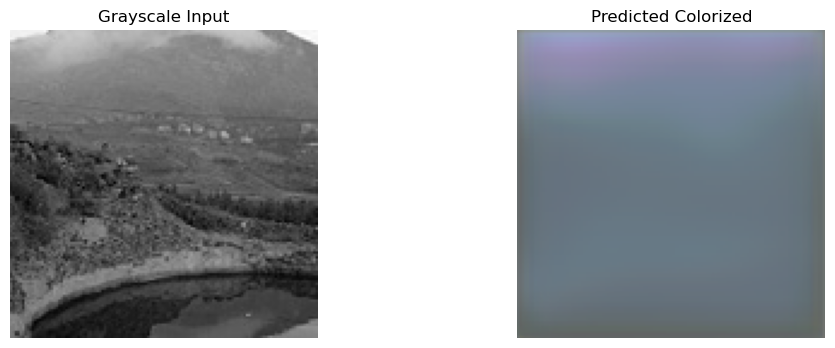

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


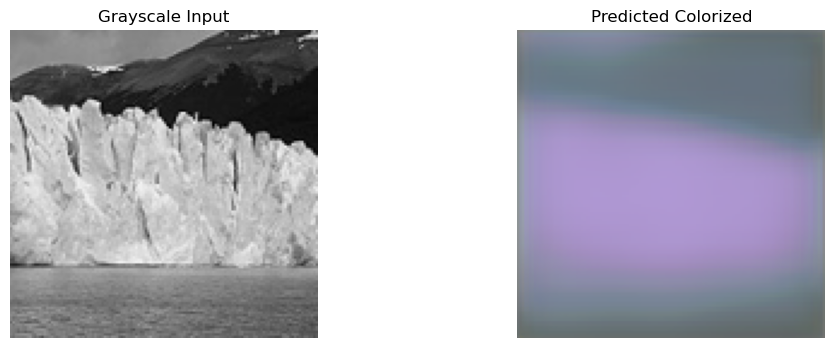

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


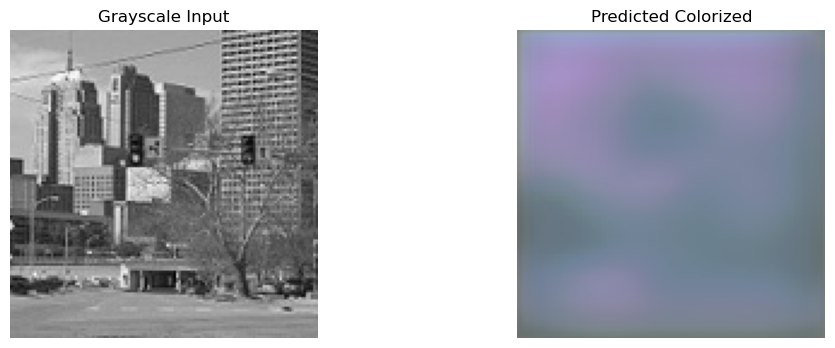

In [25]:
import matplotlib.pyplot as plt

num_images = 5
for i in range(num_images):
    grayscale = X_test_np[i].squeeze()
    predicted = model_cnn.predict(X_test_np[i:i+1])[0]
    predicted = (predicted * 255).astype(np.uint8)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale, cmap='gray')
    plt.title('Grayscale Input')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(predicted)
    plt.title('Predicted Colorized')
    plt.axis('off')
    plt.show()

U NET

In [26]:
import tensorflow as tf

def u_net(input_shape=(128, 128, 1)):
    inputs = Input(shape=input_shape)

    # Encoder
    conv1 = Conv2D(64, (3, 3), padding="same")(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = ReLU()(conv1)
    conv1 = Conv2D(64, (3, 3), padding="same")(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = ReLU()(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)
    pool1 = Dropout(0.1)(pool1)

    conv2 = Conv2D(128, (3, 3), padding="same")(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = ReLU()(conv2)
    conv2 = Conv2D(128, (3, 3), padding="same")(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = ReLU()(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)
    pool2 = Dropout(0.1)(pool2)

    conv3 = Conv2D(256, (3, 3), padding="same")(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = ReLU()(conv3)
    conv3 = Conv2D(256, (3, 3), padding="same")(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = ReLU()(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)
    pool3 = Dropout(0.2)(pool3)

    conv4 = Conv2D(512, (3, 3), padding="same")(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = ReLU()(conv4)
    conv4 = Conv2D(512, (3, 3), padding="same")(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = ReLU()(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)
    pool4 = Dropout(0.2)(pool4)

    conv5 = Conv2D(1024, (3, 3), padding="same")(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = ReLU()(conv5)
    conv5 = Conv2D(1024, (3, 3), padding="same")(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = ReLU()(conv5)
    conv5 = Dropout(0.3)(conv5)

    # Decoder
    up6 = UpSampling2D((2, 2))(conv5)
    up6 = Conv2D(512, (3, 3), padding="same")(up6)
    up6 = BatchNormalization()(up6)
    up6 = ReLU()(up6)
    up6 = Dropout(0.2)(up6)
    merge6 = concatenate([up6, conv4], axis=3)
    conv6 = Conv2D(512, (3, 3), padding="same")(merge6)
    conv6 = BatchNormalization()(conv6)
    conv6 = ReLU()(conv6)
    conv6 = Conv2D(512, (3, 3), padding="same")(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = ReLU()(conv6)

    up7 = UpSampling2D((2, 2))(conv6)
    up7 = Conv2D(256, (3, 3), padding="same")(up7)
    up7 = BatchNormalization()(up7)
    up7 = ReLU()(up7)
    up7 = Dropout(0.2)(up7)
    merge7 = concatenate([up7, conv3], axis=3)
    conv7 = Conv2D(256, (3, 3), padding="same")(merge7)
    conv7 = BatchNormalization()(conv7)
    conv7 = ReLU()(conv7)
    conv7 = Conv2D(256, (3, 3), padding="same")(conv7)
    conv7 = BatchNormalization()(conv7)
    conv7 = ReLU()(conv7)

    up8 = UpSampling2D((2, 2))(conv7)
    up8 = Conv2D(128, (3, 3), padding="same")(up8)
    up8 = BatchNormalization()(up8)
    up8 = ReLU()(up8)
    up8 = Dropout(0.1)(up8)
    merge8 = concatenate([up8, conv2], axis=3)
    conv8 = Conv2D(128, (3, 3), padding="same")(merge8)
    conv8 = BatchNormalization()(conv8)
    conv8 = ReLU()(conv8)
    conv8 = Conv2D(128, (3, 3), padding="same")(conv8)
    conv8 = BatchNormalization()(conv8)
    conv8 = ReLU()(conv8)

    up9 = UpSampling2D((2, 2))(conv8)
    up9 = Conv2D(64, (3, 3), padding="same")(up9)
    up9 = BatchNormalization()(up9)
    up9 = ReLU()(up9)
    up9 = Dropout(0.1)(up9)
    merge9 = concatenate([up9, conv1], axis=3)
    conv9 = Conv2D(64, (3, 3), padding="same")(merge9)
    conv9 = BatchNormalization()(conv9)
    conv9 = ReLU()(conv9)
    conv9 = Conv2D(64, (3, 3), padding="same")(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = ReLU()(conv9)

    output = Conv2D(3, (1, 1), activation="sigmoid")(conv9)

    model = Model(inputs=inputs, outputs=output)
    return model

model_u_net = u_net(input_shape=(128, 128, 1))
model_u_net.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss="mse",
    metrics=["mae"]
)

model_u_net.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 128, 128,  │        640 │ input_layer_3[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_34[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_11 (ReLU)     │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 128, 128,  │     36,928 │ re_lu_11[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_35[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_12 (ReLU)     │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 64, 64,    │          0 │ re_lu_12[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 64, 64,    │          0 │ max_pooling2d_9[… │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_36 (Conv2D)  │ (None, 64, 64,    │     73,856 │ dropout_14[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_36[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_13 (ReLU)     │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_37 (Conv2D)  │ (None, 64, 64,    │    147,584 │ re_lu_13[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_37[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_14 (ReLU)     │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 32, 32,    │          0 │ re_lu_14[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 32, 32,    │          0 │ max_pooling2d_10

 Total params: 34,539,715 (131.76 MB)

 Trainable params: 34,526,019 (131.71 MB)

 Non-trainable params: 13,696 (53.50 KB)

In [27]:
history = model_u_net.fit(
    X_train_np,                
    y_train_np,
    validation_data=(X_test_np, y_test_np),  
    epochs=30,                 
    batch_size=64,             
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint("u_net_colorization_best.keras", monitor='val_loss', save_best_only=True),
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
    ],
    verbose=1             
)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - loss: 0.1179 - mae: 0.2831 - val_loss: 0.0764 - val_mae: 0.2380
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 0.0521 - mae: 0.1797 - val_loss: 0.0759 - val_mae: 0.2372
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 0.0299 - mae: 0.1302 - val_loss: 0.0755 - val_mae: 0.2366
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 0.0207 - mae: 0.1059 - val_loss: 0.0752 - val_mae: 0.2361
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 0.0165 - mae: 0.0926 - val_loss: 0.0749 - val_mae: 0.2356
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0142 - mae: 0.0855 - val_loss: 0.0747 - val_mae: 0.2353
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0124 - mae: 0.0801 - val_loss: 0.0744 - val_mae: 0.2348
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0111 - mae: 0.0758 - val_loss: 0.0741 - val_mae: 0.2342
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0100 - mae: 0.0720 - 

In [28]:
model_u_net.save('colorization_model_u_net.h5') 

output_folder = "colorized_images_results_u_net"
os.makedirs(output_folder, exist_ok=True)

grayscale_inputs = X_test_np[:]
predicted_rgbs = model_u_net.predict(grayscale_inputs)
predicted_rgbs = (predicted_rgbs * 255).astype(np.uint8)

for i, (grayscale_input, predicted_rgb) in enumerate(zip(grayscale_inputs, predicted_rgbs)):
    grayscale_path = os.path.join(output_folder, f"image_{i+1}_grayscale.png")
    plt.imsave(grayscale_path, grayscale_input.squeeze(), cmap='gray')
    colorized_path = os.path.join(output_folder, f"image_{i+1}_colorized.png")
    plt.imsave(colorized_path, predicted_rgb)

print(f"Saved {len(grayscale_inputs)} grayscale and colorized images to '{output_folder}'.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Saved 31 grayscale and colorized images to 'colorized_images_results_u_net'.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


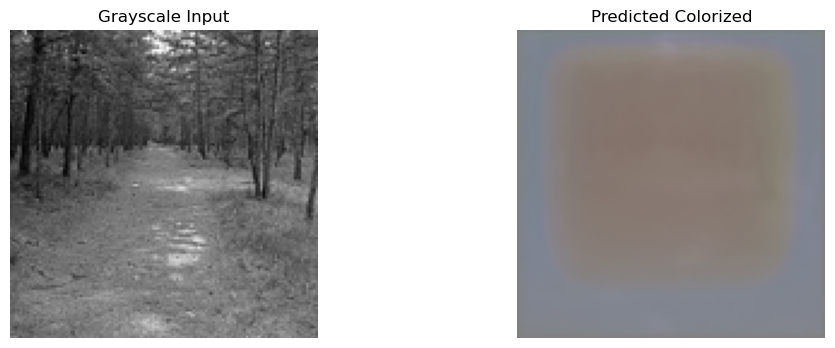

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


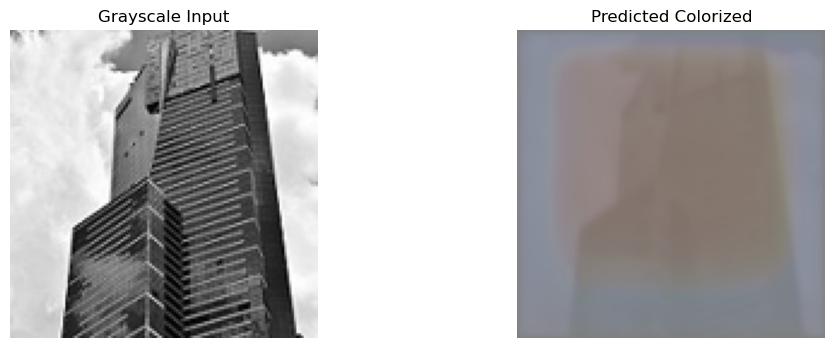

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


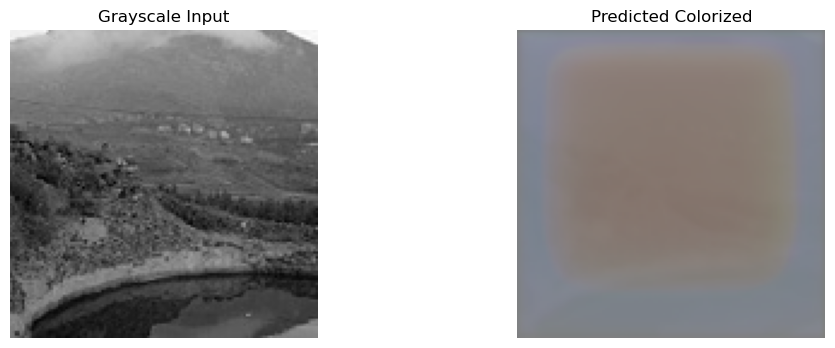

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


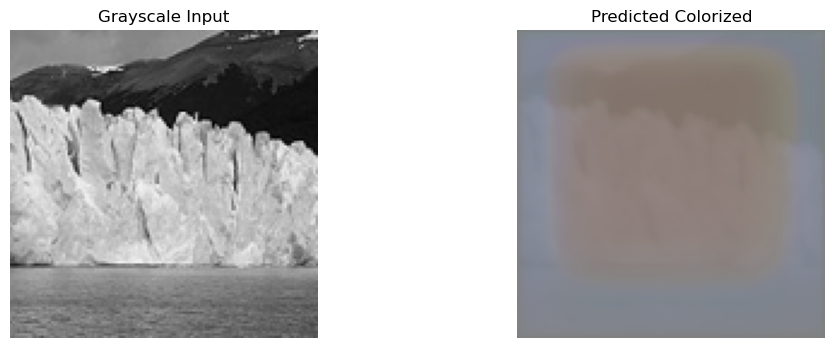

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


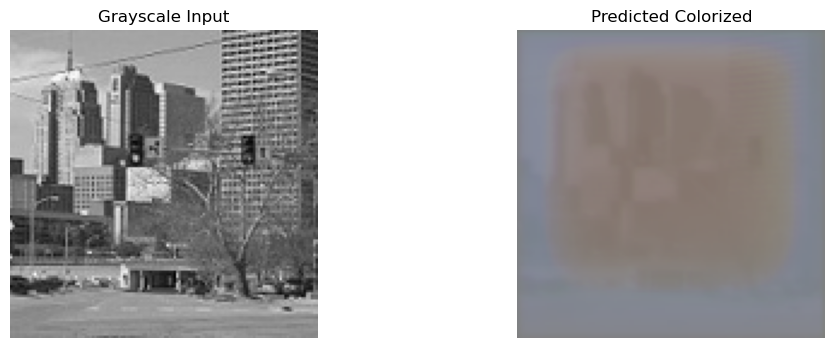

In [29]:

num_images = 5
for i in range(num_images):
    grayscale = X_test_np[i].squeeze()
    predicted = model_u_net.predict(X_test_np[i:i+1])[0]
    predicted = (predicted * 255).astype(np.uint8)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale, cmap='gray')
    plt.title('Grayscale Input')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(predicted)
    plt.title('Predicted Colorized')
    plt.axis('off')
    plt.show()

Sledeće funkcije su napravljene za lako učitavanje već istreniranih modela i predikciju fotografija 

In [32]:

def load_trained_model(model_path):
    """
    Loads a trained Keras model from a .h5 file.
    """
    model = load_model(model_path, compile=False)
    return model

def prepare_image_for_prediction(image_path, target_size=(128, 128)):
    """
    Loads a single image, converts to grayscale, resizes, normalizes, and adds batch/channel dimensions.
    Returns a numpy array ready for model prediction.
    """
    img = Image.open(image_path).convert("L")
    img = img.resize(target_size)
    img_array = np.array(img).astype("float32") / 255.0
    img_array = img_array[..., np.newaxis] 
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array  

def display_grayscale_and_colorized(grayscale_img, colorized_img):
    """
    Displays grayscale and colorized images side by side.
    grayscale_img: numpy array, shape (128, 128, 1) or (128, 128)
    colorized_img: numpy array, shape (128, 128, 3)
    """

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(grayscale_img.squeeze(), cmap='gray')
    plt.title("Grayscale Input")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(colorized_img)
    plt.title("Predicted Colorized")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step


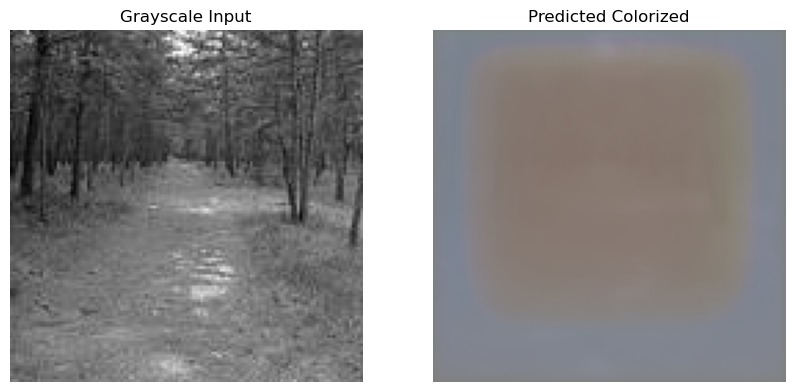

In [33]:
model = load_trained_model("colorization_model_u_net.h5")

input_img = prepare_image_for_prediction("Data/test_data_bw/20056_bw.jpg")

predicted_rgb = model.predict(input_img)[0]  
predicted_rgb = (predicted_rgb * 255).astype(np.uint8)  


display_grayscale_and_colorized(input_img[0], predicted_rgb)
